# During COVID-19 Crisis Death Toll in Istanbul

## The Motivation

    Basically, when i started this study i have 2 motivations: On of them is claims of oppenents and the other was if the COVID-19 has any indirect effect on death toll in Istanbul.

    Hiding the real COVID-19 related data is one of the main discussions among opponents of the current government in Turkey. Although the government publicize the daily data at the end od each day, many believe that the numbers are not real.

    Regarding the second motivation I expected a minor increase because of the indirect effect of COVID-19 on death toll in Istanbul. Many patients do not go to hospital because of the fear of infected with COVID-19. Unfortuntely I expected the situations some of them get severe and they may die because of indirect effect of COVID-19.

    Deceased Records Querying is one of the online services provided by the local authorities at https://www.turkiye.gov.tr/belediyeler. For this study, i worked only on the data of Istanbul which is the most crowded city in Turkey.

    By providing a particular date ( https://www.turkiye.gov.tr/istanbul-buyuksehir-belediyesi-vefat-sorgulama), from this platform a deceased person's date of birth, date of death, reason for death, first and last name, and father name could be extracted until the end of March. However, the government limited the data after some discussions for the reasons of death. Now, only the name of deceased person and the date of death (also city) are available.

    When I started this study, after googling it I realized a very similar study is done but at that time the results are not very obvious. From https://gist.github.com/oztalha/8df9e8e47d5a39d4378bf2f98a11d55f you can have a look at what was done. By the time of this study the above mentioned data (date of birth, date of death, reason for death, first and last name, and father name) was available. For my study I also used the same webscraping code by some modifications which is also available at https://github.com/ysncbk/During-COVID-19-Crisis-Death-Toll-in-Istanbul/blob/master/webscrap-turkiyegov.py.

## Data

    Most of the discussions in Turkey about COVID-19 started at the beginnig of the February. That is why 01.02.2020/2019/2018/2017-1/.04.2020/2019/2018/2017 time interval is selected for the analysis.
    After the first plot, I decided to divide the data into two parts and analyze them seperately and then to compare the results. First part of the data includes February 13-March 16 time interval and the second part of data contains 17 March-17 April time interval. The reason for the division, as can be seen from the below first image, the death toll at 17 March 2020 starts to differentiate from previous 3 years. The reason for the division is the first confirmed death in Turkey. It was announced at 17.03.2020. With the first death from COVID-19, the death toll in Istanbul started to increase.

# Methodology

    One important point is that 2020 is a leap year but previous 3 years are not. For the sake of simplicity, I excluded February 29. Some nasty coding arrangements were done for this adjustment. In this analysis I wanted compare the data of the 2020 with the values of previous three years for each day. 

#  Findings and Discussion

    Turkey confirmed its first death from the coronavirus on 17.03.2020, according to its health minister. By the April 17 (the last date of data used in this study), the death toll because of Coronavirus in Turkey was 1769.
    (https://twitter.com/drfahrettinkoca/status/1251158202915287048/photo/1)

    Unfortunately, according to findings of this study the death toll in Istanbul was significantly different from the number of people died from COVID-19 in Turkey. Since there is no data for the other big cities like Ankara and Izmir, the results of this study is peculiar to Istanbul.
    There are two nice results, which Turkey can be proud of them. First all of them, the death toll in Istanbul started to increase by the first death from COVID-19 (17.03.2020). The second good result: death toll in istanbul started to decrease in last week and it may converge to previous 3 years in next week. This could be a consequence of serious COVID-19 precautions took in Turkey in recent month.
    
    It is obvious that March 17 is a breaking point. After this date, death toll in Istanbul started to increase significantly from previous years. There could be many reasons for this situation:
    -Claims of opponents (the government hides the real numbers)
    -Indirect effect of the COVID-19 (many patients do not go to hospital because of the fear of being infected with COVID-19 but the situation gets severe and unfortuntely they pass away)
    -False COVID-19 test identification. Although many people are infected with the virus, their death reason is falsely identified.
    - or others...
    One of the interesting results in this study is that death toll in istanbul between 13.02.2020 - 16.03.2020 time interval is lower than both the same periods of 2018 and 2019 which may be a result of improvements in health system- Although it was lower until March 17 then something triggers the number of deaths to significantly differ from normal values.
    Even if these deaths are not originated from COVID-19, the reasons for this situation should be analyzed carefully and precautions should be taken to prevent this anomaly.
    If the government provides date of birth and reason for death of these people, better consequences can be deducted. Especially an anlysis by age could give better results. In addition, an increase of death reasons about respiratory issues may give an idea about false identification of COVID-19.

# Analysis

In [42]:
#import packages
import pandas as pd
from datetime import datetime
#Analysis
df = pd.read_csv('istanbul_deathtoll_data.csv',parse_dates=['Ölüm Tarihi'])#until 12 March
df1 = pd.read_csv('istanbul_deathtoll_data_1.csv',parse_dates=['Ölüm Tarihi'])#12-17 March
df = pd.concat([df, df1])
df.head()


,Adı Soyadı,Baba Adı,Doğum Tarihi,Yaşı,Ölüm Sebebi,Ölüm Tarihi,city
0,ABDO BAZAR,NaN,NaN,NaN,NaN,2017-02-01,istanbul
1,ABİDİN KAYHAN,NaN,NaN,NaN,NaN,2017-02-01,istanbul
2,ABUZER ORAL,NaN,NaN,NaN,NaN,2017-02-01,istanbul
3,ADNAN KÖPRÜ,NaN,NaN,NaN,NaN,2017-02-01,istanbul
4,AHMET ARAT,NaN,NaN,NaN,NaN,2017-02-01,istanbul


In [2]:
df.tail()

,Adı Soyadı,Baba Adı,Doğum Tarihi,Yaşı,Ölüm Sebebi,Ölüm Tarihi,city
4560,YAŞAR AKSAKAL,NaN,NaN,NaN,NaN,2020-04-17,istanbul
4561,YUSUF NARİN,NaN,NaN,NaN,NaN,2020-04-17,istanbul
4562,ZEHRA ERTUNÇ,NaN,NaN,NaN,NaN,2020-04-17,istanbul
4563,ZELİHA ÜNLÜ,NaN,NaN,NaN,NaN,2020-04-17,istanbul
4564,ZELKİF KALENDER,NaN,NaN,NaN,NaN,2020-04-17,istanbul


In [43]:
#The number of deaths per day of the year
counts = df.groupby(df['Ölüm Tarihi']).size()
counts.index.name = 'dt'
counts = counts.reset_index(name='cnt')
counts['doy'] = counts.dt.dt.dayofyear
counts

,dt,cnt,doy
0,2017-02-01,211,32
1,2017-02-02,236,33
2,2017-02-03,212,34
3,2017-02-04,249,35
4,2017-02-05,227,36
...,...,...,...
300,2020-04-13,310,104
301,2020-04-14,333,105
302,2020-04-15,300,106
303,2020-04-16,285,107


In [45]:
#Notice that 2020 is a leap year
#February 29 will be ignored in order to compare the same day of the each year
counts_leap=counts[counts.dt!='2020-02-29']
#Adjust index
counts_leap=counts_leap.reset_index(drop=True)

subset = counts_leap[counts_leap.dt.dt.year==2020]
#Adjust day of the year for 2020
leap_year_doy=pd.DataFrame(list(range(32,108)), columns =['doy1'], index=list(subset.index.values))
subset.doy= leap_year_doy.doy1

counts_leap = counts_leap[counts_leap.dt.dt.year!=2020]
counts_all = pd.concat([counts_leap, subset])
counts_all.tail()

,dt,cnt,doy
299,2020-04-13,310,103
300,2020-04-14,333,104
301,2020-04-15,300,105
302,2020-04-16,285,106
303,2020-04-17,256,107


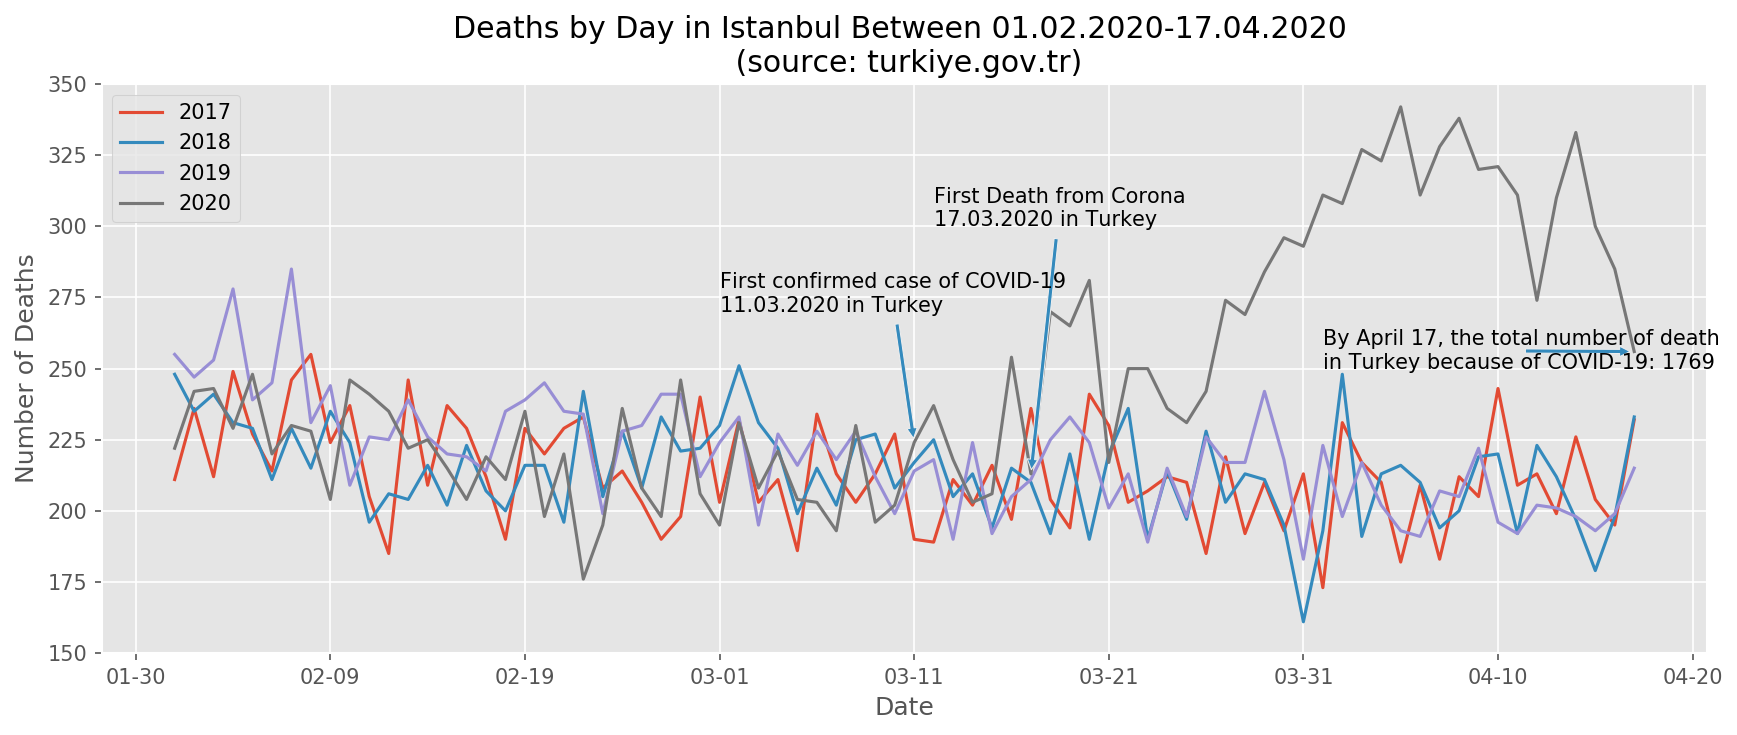

In [46]:
#First Plot, summary of all information
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import cm
plt.style.use('ggplot')
import seaborn as sns
mpl.rcParams['savefig.dpi'] = 150
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['figure.figsize'] = 12, 5
mpl.rcParams['axes.formatter.useoffset']=False
mpl.rcParams['figure.autolayout']=True

annotation_string = r"""First Death from Corona
17.03.2020 in Turkey"""
annotation_string_1 = r"""First confirmed case of COVID-19
11.03.2020 in Turkey"""
annotation_string_2 = r"""By April 17, the total number of death
in Turkey because of COVID-19: 1769"""

x_values=[datetime(2020,2,i+1) for i in range(28)]+[datetime(2020,3,i+1) for i in range(31)] +[datetime(2020,4,i+1) for i in range(17)]

by = counts_all.dt.dt.year
counts_all.groupby(by).apply(lambda x: plt.plot(x.doy,x.cnt,label=x.name))
ax = plt.gca()
ax.set(xlabel='Date',
       ylabel='Number of Deaths')
ax.set_title('Deaths by Day in Istanbul Between 01.02.2020-17.04.2020 \n (source: turkiye.gov.tr)')
ax.annotate(annotation_string, xy=(76, 213), xytext=(71, 300),
           arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3"),
            )
ax.annotate(annotation_string_1, xy=(70, 224), xytext=(60, 270),
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3"),
            )
ax.annotate(annotation_string_2, xy=(107, 256), xytext=(91, 250),
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3"),
            )

plt.gca().set_xticklabels(x_values)
myFmt = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylim(ymin=150,ymax=350)

ax.legend()
plt.show()

From the plot, we can divide the data to two by 17.th of March. Because, the number of deaths in 2020 seems to change after that day. The first significant peak can be observed after March 17. Now the analysis will focus on 17.03.2020-17.04.2020 (32 days) and previous 32 days(13.02.2020-16.03.2020).

In [47]:
#Filter the data by the first confirmed death in Turkey
counts_filt = counts_all[counts_all.doy>=76]

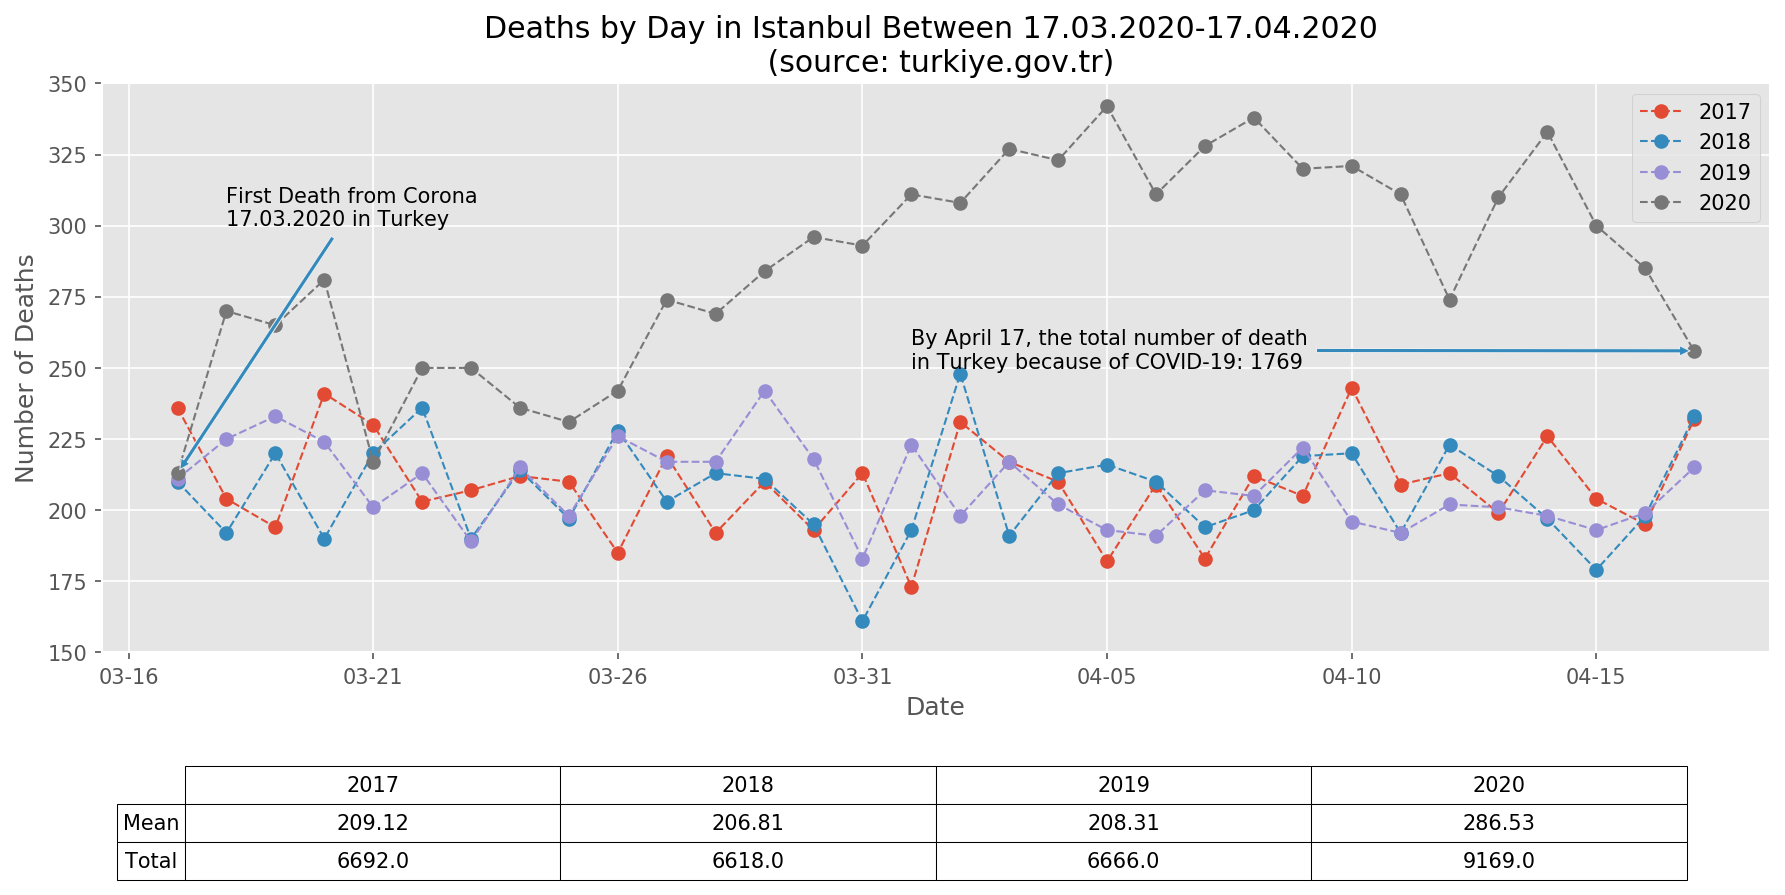

In [48]:
#Plotting: Between 17.03.2020-12.04.2020 compare 2020 with previous years 

by = counts_filt.dt.dt.year
counts_filt.groupby(by).apply(lambda x: plt.plot(x.doy,x.cnt,label=x.name,linestyle='dashed', linewidth = 1, 
         marker='o'))
ax = plt.gca()
ax.set(xlabel='Date',
       ylabel='Number of Deaths')
ax.set_title('Deaths by Day in Istanbul Between 17.03.2020-17.04.2020 \n (source: turkiye.gov.tr)')
ax.annotate(annotation_string, xy=(76, 213), xytext=(77, 300),
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3"),
            )
ax.annotate(annotation_string_2, xy=(107, 256), xytext=(91, 250),
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3"),
            )

plt.gca().set_xticklabels(x_values)
myFmt = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylim(ymin=150,ymax=350)

ax.legend()

dcsummary = pd.DataFrame([ round(counts_filt.groupby(counts_filt.dt.dt.year)['cnt'].mean(),2), round(counts_filt.groupby(counts_filt.dt.dt.year)['cnt'].sum(),0)],index=['Mean','Total'])

plt.table(cellText=dcsummary.values,colWidths = [0.3]*len(counts_filt.groupby(counts_filt.dt.dt.year)),
        rowLabels=dcsummary.index.values,
        colLabels=dcsummary.columns.values,
        cellLoc = 'center', rowLoc = 'center',
        loc='bottom',bbox=[0.05, -0.4, 0.9, 0.2])
# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

fig = plt.gcf()

plt.show()


As can be seen, 17.03-17.04 time interval shows significant change in 2020. This significant change (about 2500 more than previous years) is even greater than the total number of deaths in Turkey from COVID-19 (total:1769 by 17 April). Even if all death cases from COVID-19 occured in Istanbul, the difference can not be completed. On average, per day 80 more people died in Istanbul in 2020 for specified time interval. The good news is that by 04-14-2020 the numbers started to decrease. 

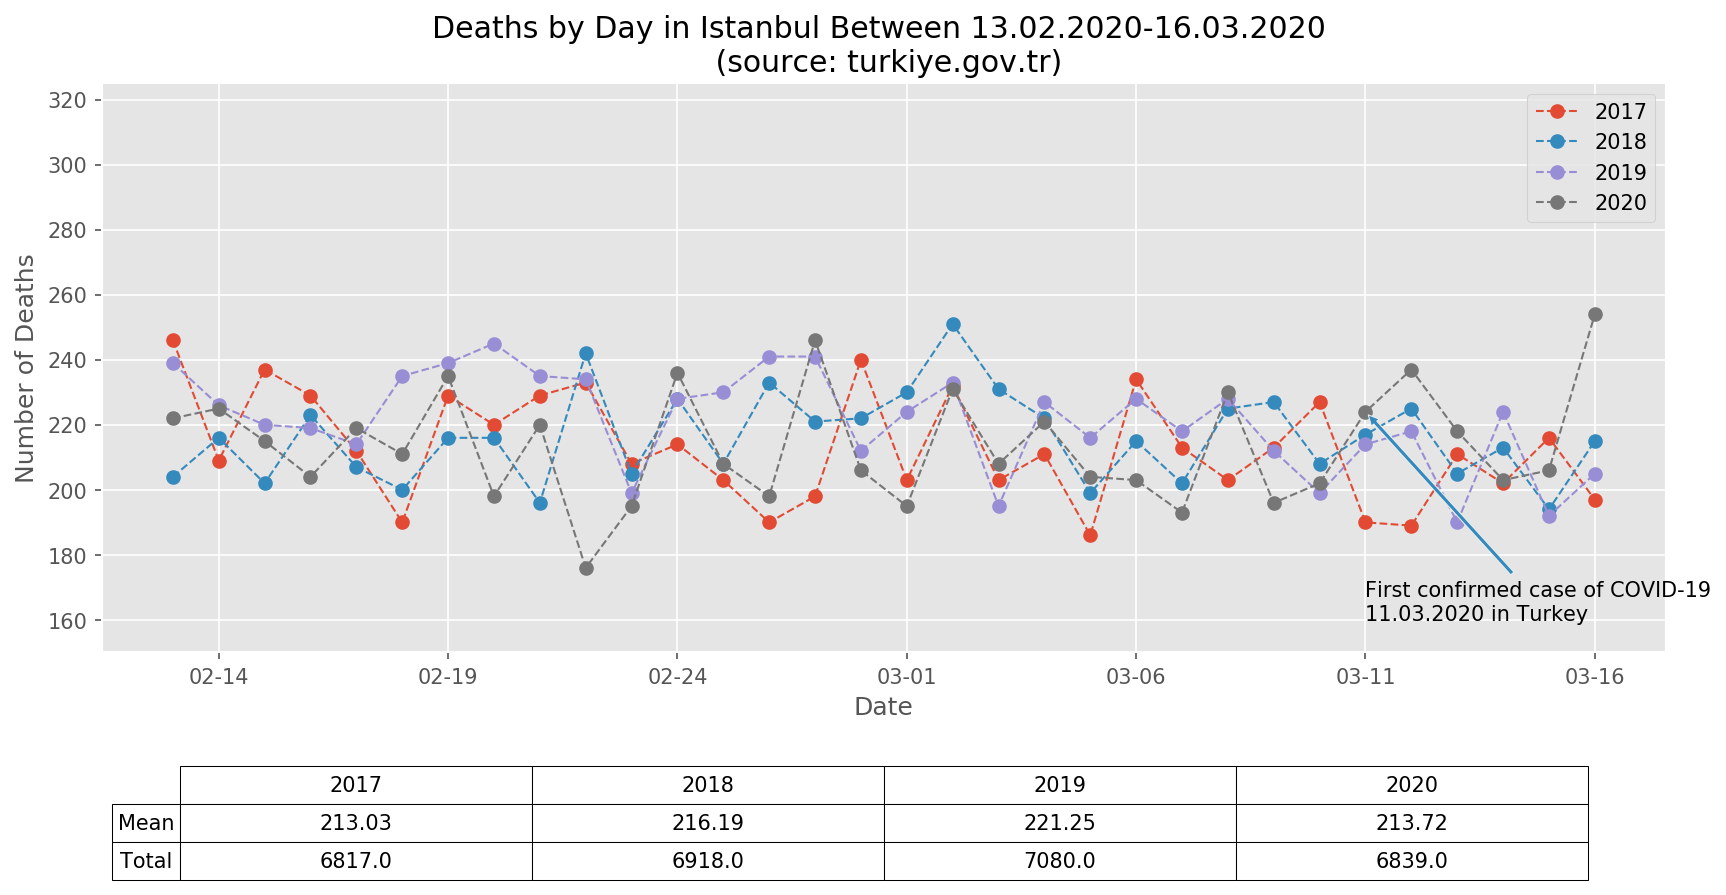

In [49]:
#The same analysis between 13.02.2020-16.03.2020 
counts_filt = counts_all[(counts_all.doy>43) & (counts_all.doy<76)]

by = counts_filt.dt.dt.year
counts_filt.groupby(by).apply(lambda x: plt.plot(x.doy,x.cnt,label=x.name,linestyle='dashed', linewidth = 1, 
         marker='o'))
ax = plt.gca()
ax.set(xlabel='Date',
       ylabel='Number of Deaths')
ax.set_title('Deaths by Day in Istanbul Between 13.02.2020-16.03.2020 \n (source: turkiye.gov.tr)')
ax.annotate(annotation_string_1, xy=(70, 224), xytext=(70, 160),
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3"),
            )
plt.gca().set_xticklabels(x_values)
myFmt = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylim(ymin=150,ymax=325)

ax.legend()

dcsummary = pd.DataFrame([ round(counts_filt.groupby(counts_filt.dt.dt.year)['cnt'].mean(),2), round(counts_filt.groupby(counts_filt.dt.dt.year)['cnt'].sum(),0)],index=['Mean','Total'])

plt.table(cellText=dcsummary.values,colWidths = [0.3]*len(counts_filt.groupby(counts_filt.dt.dt.year)),
        rowLabels=dcsummary.index.values,
        colLabels=dcsummary.columns.values,
        cellLoc = 'center', rowLoc = 'center',
        loc='bottom',bbox=[0.05, -0.4, 0.9, 0.2])
# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.3)

fig = plt.gcf()

plt.show()


Despite all the discussions, for previous 32 days of first death confirmation in Turkey, all 4 years show similar patterns. Even, 2020 is one of the year with least death records. It can be deducted that, COVID-19 started to influence Istanbul significantly by March 17.

In [61]:
#Filter the data
counts_filt = counts_all[counts_all.doy>=76]
cts_2020 = counts_filt[counts_filt.dt.dt.year==2020]

cts_1719= counts_filt[counts_filt.dt.dt.year!=2020]
#Find Median and Max of previous three years per day of the year after 11.th March

med_1719=cts_1719.groupby([cts_1719.doy]).mean()
#Create date calues instead of day of the year
x_values=[datetime(2020,3,i+17) for i in range(15)]+[datetime(2020,4,i+1) for i in range(17)]


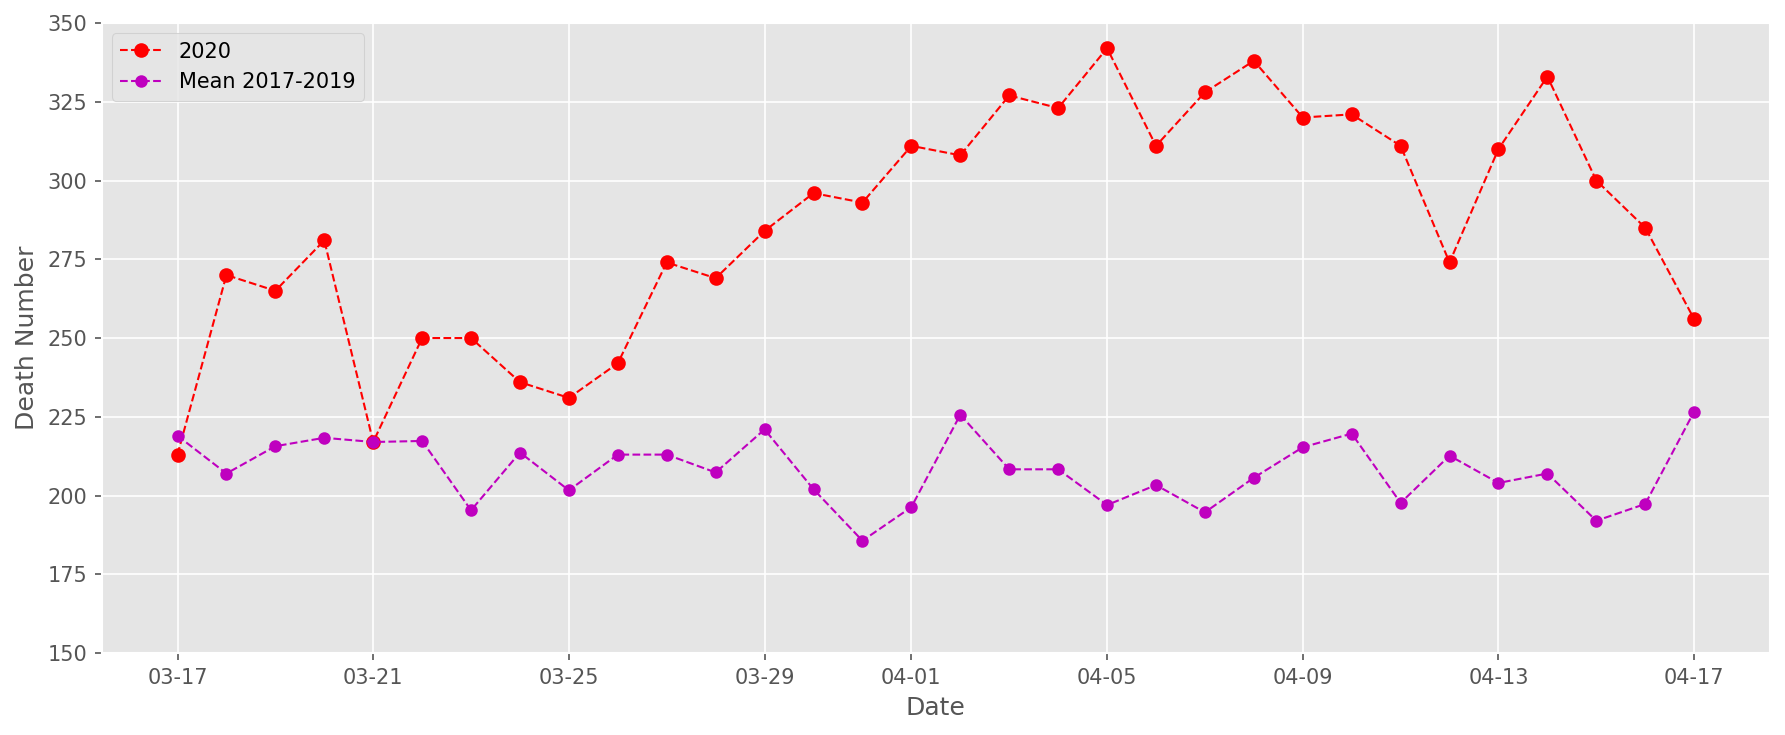

In [62]:
#Plotting with Median&Maximum of previous 3 years
# plotting the 2020 by March 17

annotation_string = r"""First Death from Corona
17.03.2020 in Turkey"""
 
plt.plot(x_values, cts_2020.cnt, 'r',label = "2020", linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='red', markersize=6)
plt.plot(x_values, med_1719.cnt, 'm',label = "Mean 2017-2019", linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='m', markersize=5)
plt.xlabel('Date') 
plt.ylabel('Death Number')
ax=plt.gca()
myFmt = mdates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylim(ymin=150,ymax=350)

plt.legend() 
plt.show()

In [63]:
dif=[sum(i) for i in zip(cts_2020.cnt, -med_1719.cnt)]
dif = pd.DataFrame(dif, columns = ['Difference']) 
cumsum = dif.cumsum(skipna = False) 
cumulativesum=cumsum.Difference.iloc[-1]
cumulativesum

2510.3333333333335

With respect to mean of 2017-2019 reference year interval, the number of deaths in 2020 are 2510 greater.
The total number of deaths in Turkey because of COVID-19 is 1769 by April 17. The official numbers announced by government either manipulated or most of the case were falsely identified.